# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
from datetime import datetime
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
bitcoin_response = requests.get(btc_url).json()
# Fetch current ETH price
ethereum_response = requests.get(eth_url).json()
btc_price = bitcoin_response["data"]["1"]["quotes"]["CAD"]["price"]
eth_price = ethereum_response["data"]["1027"]["quotes"]["CAD"]["price"]
#print(json.dumps(bitcoin_response,indent=4)) USED TO CONFIRM BITCOIN index is 1
#print(json.dumps(ethereum_response,indent=4)) USED TO CONFIRM ETHEREUM index is 1027

In [6]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $67510.41
The current value of your 5.3 ETH is $21138.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

shares_data = { "shares":[200,50]}
tickers = ["AGG","SPY"]
#Shares portfolio dataframe

shares_df = pd.DataFrame(shares_data, index=tickers)
shares_df

,shares
AGG,200
SPY,50


In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
alpaca_api_key
alpaca_secret_key

'3mmHZjtAYKchblJx2LAhE5lmgFlRiQ01ZdRfUlOf'

In [10]:
# Format current date as ISO format
Today = pd.Timestamp("2021-09-20", tz="EST").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df1_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    limit = 1000,
    start = Today,
    end = Today
).df

df1_portfolio


AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-09-20 00:00:00-04:00  116.02  116.17  115.975  116.12  4463038  434.88   

                                                              
                             high     low   close     volume  
time                                                          
2021-09-20 00:00:00-04:00  436.56  428.86  434.07  149948277

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df1_portfolio["AGG"]['close'])
spy_close_price = float(df1_portfolio["SPY"]['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.12
Current SPY closing price: $434.07


In [12]:
# Compute the current value of shares
my_spy_value = spy_close_price * shares_df.loc["SPY"]["shares"]
my_agg_value = agg_close_price * shares_df.loc["AGG"]["shares"]
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21703.50
The current value of your 200 AGG shares is $23224.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 8000
# Consolidate financial assets data
financial_assets = [my_agg_value + my_spy_value, my_btc_value + my_eth_value]
# Create savings DataFrame
df_savings = pd.DataFrame(financial_assets, index=["Shares","Crypto"], columns=["Amounts"])

# Display savings DataFrame
display(df_savings)

,Amounts
Shares,44927.500000
Crypto,88648.703528


<AxesSubplot:title={'center':'Savings Structure'}, ylabel='Amounts'>

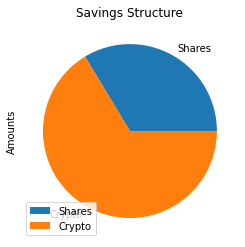

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="Amounts", title = "Savings Structure")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()
total_savings = total_savings["Amounts"]
total_savings

required = total_savings - emergency_fund


# Validate saving health
if total_savings > emergency_fund :
    print("You have enough Money in this fund!")
elif total_savings == emergency_fund:
    print("You are on par with your Financial Goal")
elif total_savings < emergency_fund:
    print(f"You need ${required} to reach your goal of saving enough in your emergency fund.")

You have enough Money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-19', tz='EST').isoformat()
end_date = pd.Timestamp('2021-09-20', tz='EST').isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = start_date,
    end = end_date

).df

# Display sample data
df_stock_data.tail()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2021-09-14 00:00:00-04:00  116.07  116.3800  116.0700  116.28  4036304.0   
2021-09-15 00:00:00-04:00  116.29  116.2929  116.0900  116.19  3348036.0   
2021-09-16 00:00:00-04:00  115.95  116.1100  115.9050  115.99  3673608.0   
2021-09-17 00:00:00-04:00  115.80  115.8750  115.7428  115.85  4662040.0   
2021-09-20 00:00:00-04:00  116.02  116.1700  115.9750  116.12  4463038.0   

                              SPY                                       
                             open    high     low   close       volume  
time                                                                    
2021-09-14 00:00:00-04:00  448.12  448.34  443.22  444.18   67959711.0  
2021-09-15 00:00:00-04:00  444.62  448.41  443.44  447.87   69265024.0  
2021-09-16 00:00:00-04:00  447.32  448.36  444.02  447.14   69354318.0  
2021-09-17 00:00:00-04:00  444.92  445.37  441.02  441.41  100861596.0  
2021-09-20 00:00:00-04:00  434.88  436.56  428.86  434.07  149948277.0

In [33]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [57]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MCSIMULATION_30Y = MCSimulation(
    portfolio_data= df_stock_data,
    weights = [.80 , .20], ##############How to choose the weights here ??
    num_simulation = 1000, ##############How many samples to work with ?
    num_trading_days = 252*30
)

In [58]:
# Printing the simulation input data
MCSIMULATION_30Y.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324.0   
2017-09-29 00:00:00-04:00  109.74  109.77  109.54  109.640  2969204.0   
2017-10-02 00:00:00-04:00  109.43  109.47  109.33  109.425  3840216.0   
2017-10-03 00:00:00-04:00  109.46  109.54  109.40  109.520  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.41  109.500  2130907.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2017-09-28 00:00:00-04:00          NaN     NaN     NaN       NaN     NaN   
2017-09-29 00:00:00-04:00    -0.000365  250.34  251.32  250.1300  251.20   
2017-10-02 00:00:00-04:00    -0.001961  251.49  252.30  251.2926  252.29   
2017-10-03 00:00:00-04:00     0.000868  252.46  252.89  252.2300  252.85   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.5600  253.16   

                                                    
                               volume daily_return  
time                                                
2017-09-28 00:00:00-04:00         NaN          NaN  
2017-09-29 00:00:00-04:00  41410208.0          NaN  
2017-10-02 00:00:00-04:00  37469184.0     0.004339  
2017-10-03 00:00:00-04:00  33875099.0     0.002220  
2017-10-04 00:00:00-04:00  30217246.0     0.001226

In [59]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MCSIMULATION_30Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007605,0.996678,0.999324,1.001439,1.006290,1.001402,1.003235,0.993982,0.995324,1.001044,...,0.996767,0.999125,1.004780,1.001920,1.001663,0.999763,1.005014,1.007403,1.005326,1.004760
2,1.010758,1.001395,0.998516,1.003894,1.009163,0.998063,1.001362,0.998454,1.003635,1.004149,...,0.997280,1.000945,1.006482,1.007392,0.998849,0.993949,1.004427,1.007144,1.006972,1.002097
3,1.011965,0.999208,0.994130,1.003491,1.006180,0.995029,0.999137,0.995374,1.004843,0.999400,...,0.998114,1.005719,1.004925,1.008469,0.996554,0.994926,0.997841,1.006456,1.007282,0.998121
4,1.014743,1.001767,1.002251,1.008461,1.007098,0.993571,0.997917,1.001359,1.006543,0.999324,...,1.000060,1.007412,1.005200,1.003300,0.995295,0.995479,0.999057,1.008384,1.005184,1.004476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.412075,2.128620,5.941503,6.413043,3.600142,3.209626,2.959958,5.274645,3.923452,3.515166,...,4.573225,3.351751,4.410556,3.566357,5.117755,4.515939,4.686475,2.628859,2.510045,2.173677
7557,4.416776,2.121495,5.973588,6.407318,3.586762,3.201685,2.968416,5.264866,3.930686,3.528714,...,4.556793,3.335911,4.389141,3.554864,5.117250,4.554394,4.677834,2.632849,2.510186,2.174720
7558,4.422345,2.116921,5.955219,6.389566,3.586150,3.198975,2.960056,5.246856,3.947959,3.527774,...,4.548239,3.326155,4.385666,3.548068,5.130057,4.555259,4.706874,2.646602,2.499645,2.182187
7559,4.413604,2.112314,5.963790,6.442377,3.573492,3.195541,2.967125,5.248299,3.954561,3.528705,...,4.545627,3.329235,4.369913,3.540309,5.100419,4.557901,4.739518,2.639573,2.510620,2.179941


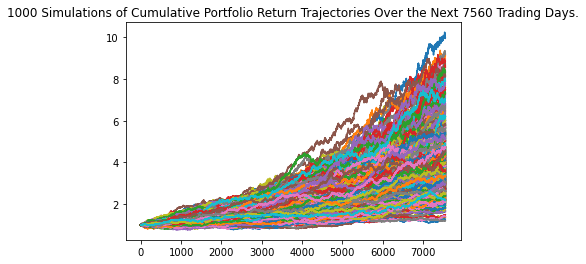

In [61]:
# Plot simulation outcomes
Lines_plot = MCSIMULATION_30Y.plot_simulation() 

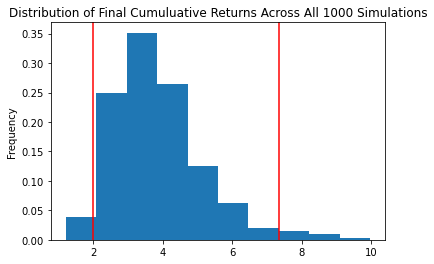

In [62]:
# Plot probability distribution and confidence intervals
dist_plot = MCSIMULATION_30Y.plot_distribution()

### Retirement Analysis

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_analysis = MCSIMULATION_30Y.summarize_cumulative_return()
# Print summary statistics
print(retirement_analysis)

count           1000.000000
mean               3.861468
std                1.324213
min                1.205962
25%                2.951817
50%                3.660825
75%                4.494090
max                9.966610
95% CI Lower       1.978134
95% CI Upper       7.333548
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [65]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
confint_lower = round(retirement_analysis[8]*initial_investment,2)
confint_upper = round(retirement_analysis[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${confint_lower} and ${confint_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39562.67 and $146670.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [66]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
confint_lower = round(retirement_analysis[8]*initial_investment,2)
confint_upper = round(retirement_analysis[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${confint_lower} and ${confint_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $59344.01 and $220006.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [67]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MCSIMULATION_5Y = MCSimulation(
    portfolio_data= df_stock_data,
    weights = [.80 , .20],
    num_simulation = 1000, 
    num_trading_days = 252*5
)

In [68]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MCSIMULATION_5Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997654,0.994805,0.998232,0.994829,1.000529,0.996342,0.998194,1.004645,0.993317,1.003662,...,0.999389,0.994823,1.002580,1.001127,1.000577,1.003293,1.002732,0.995451,1.001473,0.999721
2,0.999082,0.994411,0.995057,0.997384,1.007617,0.996965,0.995439,1.008434,0.993772,1.004251,...,1.000855,0.993307,1.010494,1.005097,0.998282,1.005100,1.002728,0.998358,1.004377,0.996615
3,1.004066,0.991600,0.996947,1.003239,1.003226,0.991250,0.996794,1.005027,0.995111,1.007057,...,0.993501,0.992578,1.006807,1.003439,0.999595,1.007269,1.001983,0.995936,0.998516,0.996880
4,1.004615,0.992555,0.995000,1.000257,1.005346,0.994362,0.996121,1.005002,0.995721,1.014590,...,1.002151,0.993744,1.006146,1.002709,0.999156,1.003284,0.999882,0.997073,0.994967,1.003205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.095349,1.201498,1.267080,1.189794,1.161587,1.191183,1.479693,1.057226,1.085337,1.482515,...,1.169812,1.356993,1.224503,1.603673,1.359044,1.185615,1.067508,1.258608,1.017807,1.163349
1257,1.102376,1.201187,1.269656,1.195284,1.155533,1.193967,1.480137,1.058397,1.089806,1.484709,...,1.167022,1.352752,1.226229,1.601587,1.354557,1.183399,1.072468,1.261646,1.018618,1.161545
1258,1.105435,1.197902,1.266362,1.197934,1.156269,1.193336,1.493489,1.057020,1.092560,1.490012,...,1.160944,1.358241,1.226892,1.593941,1.346243,1.190461,1.074490,1.263191,1.013542,1.160827
1259,1.111289,1.201185,1.264906,1.196533,1.157396,1.196184,1.500537,1.059624,1.092135,1.491375,...,1.152398,1.363935,1.217587,1.598437,1.346552,1.197397,1.074402,1.262967,1.014920,1.157477


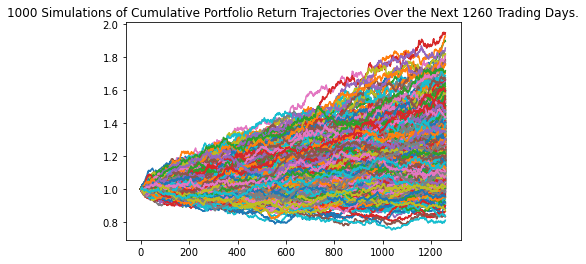

In [86]:
# Plot simulation outcomes
line_plot = MCSIMULATION_5Y.plot_simulation() #########how to change the size of te figure


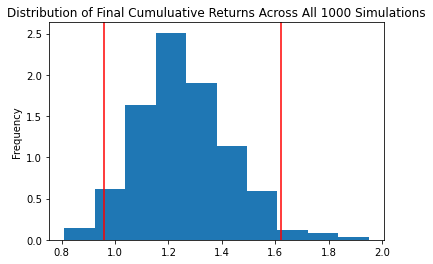

In [69]:
# Plot probability distribution and confidence intervals
dist_plot = MCSIMULATION_5Y.plot_distribution()

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
analysis_5y = MCSIMULATION_5Y.summarize_cumulative_return()
# Print summary statistics
print(analysis_5y)

count           1000.000000
mean               1.258771
std                0.174173
min                0.810217
25%                1.140660
50%                1.241940
75%                1.367891
max                1.949305
95% CI Lower       0.960514
95% CI Upper       1.622527
Name: 1260, dtype: float64


In [77]:
# Set initial investment
initial_investment = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(analysis_5y[8]*initial_investment,2)
ci_upper_five = round(analysis_5y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $9605.14 and $16225.27


### Ten Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MCSIMULATION_10Y = MCSimulation(
    portfolio_data= df_stock_data,
    weights = [.80 , .20],
    num_simulation = 1000, 
    num_trading_days = 252*10
)

In [81]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MCSIMULATION_10Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002464,0.996623,0.990852,1.006630,0.993182,1.004246,0.997807,0.996177,0.993215,1.000651,...,1.000399,0.995258,0.994882,1.002257,0.996548,0.993918,1.006480,1.001086,1.010412,1.003068
2,1.008274,0.997067,0.993934,1.006074,0.995117,1.001678,0.999728,0.997774,0.992023,0.999628,...,1.000347,0.999051,0.993905,1.003143,0.994778,0.992529,1.002147,0.999283,1.010986,1.001164
3,1.006667,1.001408,0.992019,1.001472,0.995275,1.001071,0.995533,1.000754,0.989751,1.006408,...,0.997669,1.004908,0.996056,1.006605,1.002008,0.989302,1.005088,1.004895,1.003899,1.001733
4,1.006823,1.006868,0.986864,1.006008,0.993070,0.994675,0.992637,0.997515,0.989309,1.004780,...,0.988692,1.002030,0.997872,1.003731,0.998732,0.981543,1.004398,1.001280,1.004891,1.000674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.242655,2.130528,1.836416,1.310754,1.550672,1.103349,1.400234,2.233262,1.460845,1.890978,...,1.313154,1.151218,1.916425,1.077815,1.141454,1.067948,2.114251,1.979479,1.323039,2.133525
2517,2.241617,2.146372,1.839680,1.307066,1.554242,1.105511,1.401442,2.240773,1.462723,1.892151,...,1.307166,1.151072,1.919541,1.076825,1.148268,1.061394,2.117555,1.981141,1.317831,2.128952
2518,2.243344,2.138978,1.841190,1.305066,1.546589,1.095778,1.404363,2.235438,1.468228,1.878587,...,1.304175,1.152687,1.921267,1.075222,1.147672,1.060762,2.129119,1.980612,1.325190,2.119837
2519,2.253140,2.141839,1.847097,1.303053,1.542336,1.089960,1.405604,2.240075,1.468040,1.868915,...,1.300448,1.148015,1.931914,1.075802,1.145035,1.062061,2.128068,1.982924,1.324520,2.117725


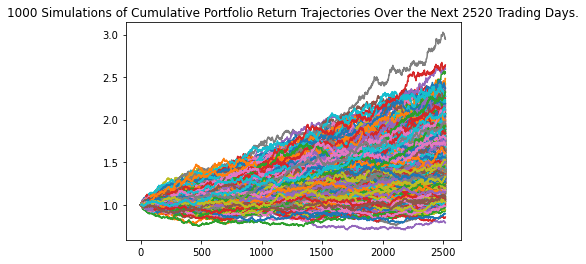

In [88]:
# Plot simulation outcomes
line_plot = MCSIMULATION_10Y.plot_simulation() #########how to change the size of te figure

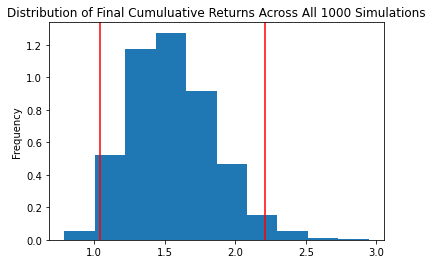

In [89]:
# Plot probability distribution and confidence intervals
dist_plot = MCSIMULATION_10Y.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
analysis_10y = MCSIMULATION_5Y.summarize_cumulative_return()
# Print summary statistics
print(analysis_10y)

count           1000.000000
mean               1.258771
std                0.174173
min                0.810217
25%                1.140660
50%                1.241940
75%                1.367891
max                1.949305
95% CI Lower       0.960514
95% CI Upper       1.622527
Name: 1260, dtype: float64


In [91]:
# Set initial investment
initial_investment = 50000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(analysis_5y[8]*initial_investment,2)
ci_upper_five = round(analysis_5y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $48025.72 and $81126.33
